<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06



<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



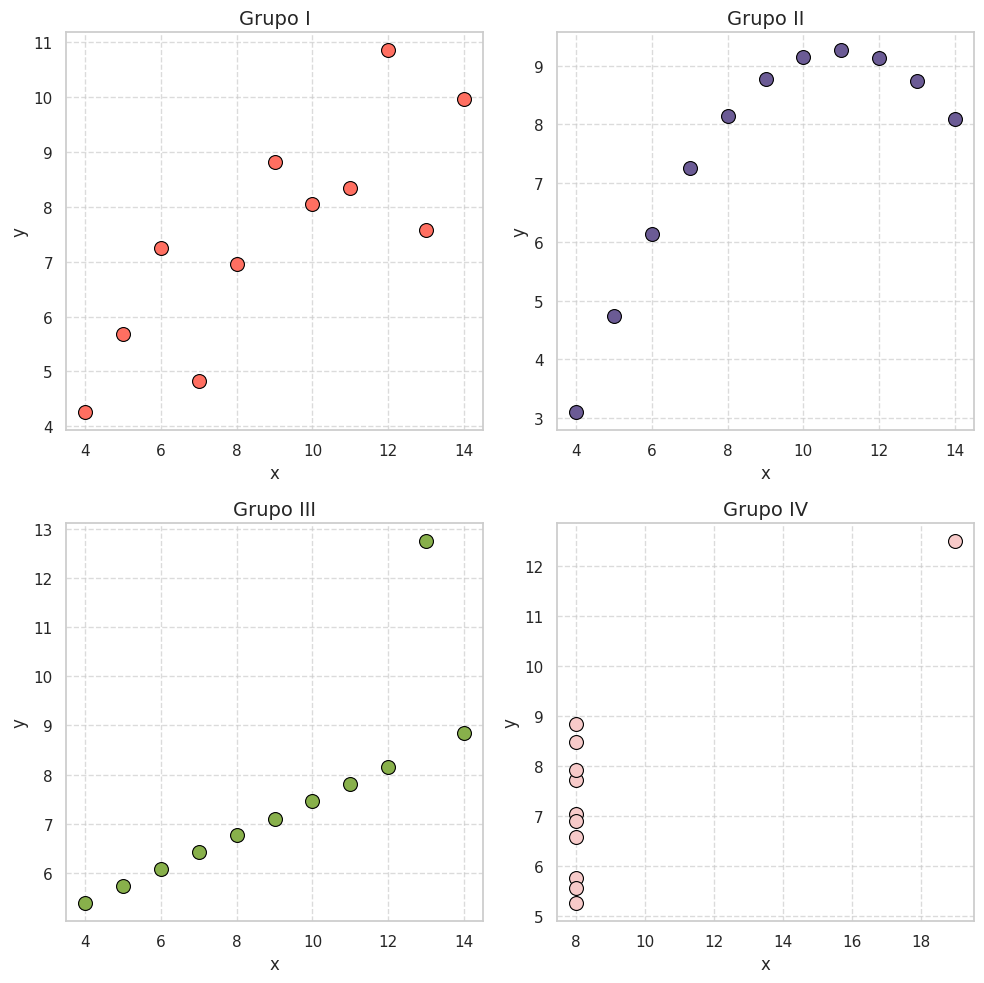

In [2]:

# Filtrar los datos por los cuatro grupos
datasets = ['I', 'II', 'III', 'IV']

# Define colores
colores = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9']

# Crear gráficos de dispersión para cada conjunto de datos
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, dataset in enumerate(datasets):
    subset = data[data['dataset'] == dataset]
    ax = axes[i // 2, i % 2]
    sns.scatterplot(x='x', y='y', data=subset, ax=ax, color=colores[i], s=100, edgecolor='black')
    ax.set_title(f'Grupo {dataset}', fontsize=14)
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)

# Ajustar el espaciado y mostrar los gráficos
plt.tight_layout()
plt.show()


A partir de la visualización, se pueden identificar diferencias significativas entre los cuatro grupos del cuarteto de Anscombe. En el Grupo I, se observa una clara relación lineal positiva entre x e y, lo que sugiere un comportamiento que sigue una regresión lineal tradicional. En el Grupo II, aunque la regresión lineal sigue presente, los datos muestran una tendencia cuadrática, lo que indica una relación no lineal entre x e y. El Grupo III presenta un punto atípico o "outlier" que distorsiona la relación lineal, evidenciando cómo un solo punto puede afectar significativamente el análisis estadístico. Finalmente, en el Grupo IV, la mayoría de los puntos se alinean verticalmente, con un valor atípico que sugiere la falta de una relación significativa entre las variables, salvo por el impacto de ese único valor extremo.

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [3]:
# Importar las bibliotecas necesarias
import seaborn as sns
import pandas as pd

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Usar el comando describe() para obtener un resumen estadístico por grupo
grupos_estadisticas = data.groupby('dataset').describe()
print(grupos_estadisticas)


            x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50  


Se observa que los cuatro grupos del cuarteto de Anscombe comparten propiedades estadísticas similares, como la media de x (9) y y (7.5), así como la desviación estándar de x (3.316625) y valores comparables en los cuartiles. Sin embargo, las desviaciones estándar de y muestran ligeras diferencias entre los grupos, siendo más bajas en el Grupo II y más altas en el Grupo III debido a la presencia de un punto atípico en este último. Aunque estas estadísticas básicas parecen indicar patrones similares entre los grupos, las diferencias en la distribución real de los datos, como la presencia de relaciones no lineales o puntos atípicos, influyen significativamente en la comprensión de sus respectivas distribuciones.

3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



Grupo I: MSE=1.25, R²=0.67
Grupo II: MSE=1.25, R²=0.67
Grupo III: MSE=1.25, R²=0.67
Grupo IV: MSE=1.25, R²=0.67


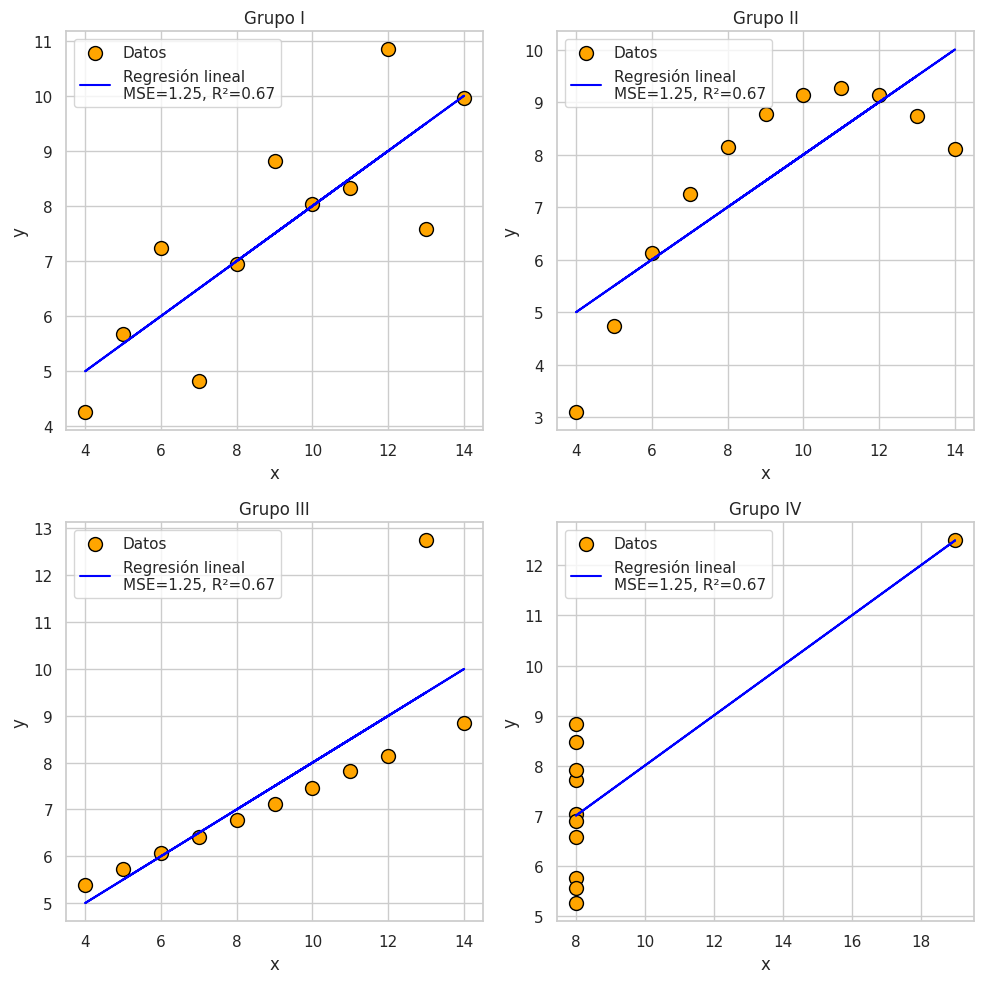

In [7]:
# Importar las bibliotecas necesarias
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Definir los grupos
datasets = ['I', 'II', 'III', 'IV']

# Crear la figura para los gráficos
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Ajustar un modelo de regresión lineal y calcular las métricas para cada grupo
for i, dataset in enumerate(datasets):
    subset = data[data['dataset'] == dataset]
    X = subset['x'].values.reshape(-1, 1)
    y = subset['y']

    # Ajustar el modelo de regresión lineal
    modelo = LinearRegression()
    modelo.fit(X, y)

    # Predecir los valores de y
    y_pred = modelo.predict(X)

    # Calcular las métricas MSE y R²
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Imprimir los resultados para verificar
    print(f"Grupo {dataset}: MSE={mse:.2f}, R²={r2:.2f}")

    # Graficar los puntos y la línea de regresión
    ax = axes[i // 2, i % 2]
    ax.scatter(X, y, color='orange', edgecolor='black', s=100, label='Datos')
    ax.plot(X, y_pred, color='blue', label=f'Regresión lineal\nMSE={mse:.2f}, R²={r2:.2f}')
    ax.set_title(f'Grupo {dataset}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()

plt.tight_layout()
plt.show()

Aunque los valores de MSE y R² son iguales en todos los gráficos, la visualización muestra que los modelos lineales no son igualmente adecuados para todos los conjuntos de datos. Mientras que el Grupo I se ajusta bien al modelo lineal, los Grupos II, III y IV presentan características que hacen que el modelo no capture adecuadamente las tendencias o la distribución de los datos.

4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

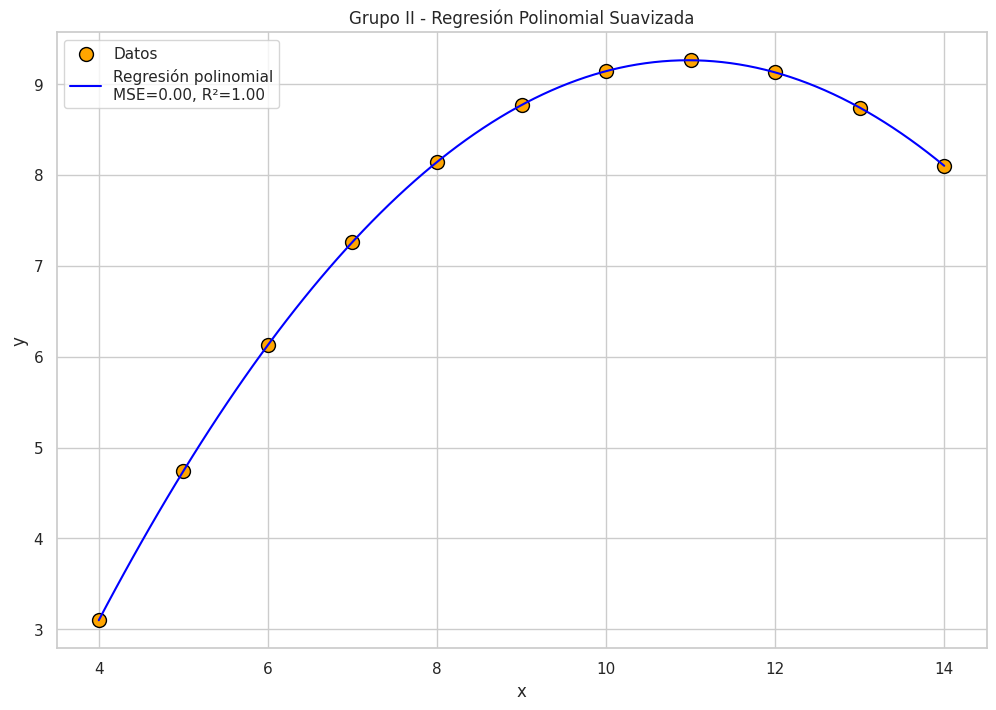

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np

# Seleccionar datos del Grupo II
subset = data[data['dataset'] == 'II']
X = subset['x'].values.reshape(-1, 1)
y = subset['y']

# Crear un modelo de regresión polinomial de grado 2
modelo_polinomial = make_pipeline(PolynomialFeatures(2), LinearRegression())
modelo_polinomial.fit(X, y)

# Generar más puntos de X para suavizar la curva
X_suave = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred_polinomial_suave = modelo_polinomial.predict(X_suave)

# Predecir los valores de y con los datos originales para comparación
y_pred_polinomial = modelo_polinomial.predict(X)

# Calcular métricas MSE y R²
mse_polinomial = mean_squared_error(y, y_pred_polinomial)
r2_polinomial = r2_score(y, y_pred_polinomial)

# Graficar los puntos y la curva de regresión suavizada
plt.scatter(X, y, color='orange', edgecolor='black', s=100, label='Datos')
plt.plot(X_suave, y_pred_polinomial_suave, color='blue', label=f'Regresión polinomial\nMSE={mse_polinomial:.2f}, R²={r2_polinomial:.2f}')
plt.title('Grupo II - Regresión Polinomial Suavizada')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Para mejorar el ajuste de los modelos en los casos donde la regresión lineal no es adecuada, como se observa en algunos grupos del cuarteto de Anscombe, se pueden aplicar varias estrategias. En el Grupo III, es recomendable eliminar o tratar outliers mediante técnicas de regresión robusta para minimizar su impacto en el modelo. En el Grupo II, que presenta una relación no lineal, se puede mejorar el ajuste utilizando regresión polinomial para capturar la curvatura de los datos. Además, en algunos casos, las transformaciones de variables (logarítmica, exponencial) pueden linearizar la relación entre las variables. Finalmente, para casos como el Grupo IV, donde la relación no es clara, se podrían considerar modelos más complejos como árboles de decisión o regresión local para capturar patrones más complejos en los datos.